# Load libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from shuyu import *
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [137]:
# Import the data
%time df = pd.read_csv('train_ver2.csv',parse_dates=['fecha_dato','fecha_alta'])
df.head()

<string>:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 1min 3s, sys: 30 s, total: 1min 33s
Wall time: 1min 54s


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [138]:
display_all(df.head(5))

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


# Data cleaning

In [139]:
df = df.rename({'fecha_dato':'date','ncodpers':'customerid','ind_empleado':'employee_index','pais_residencia':'country_residence',
                'sexo':'gender','age':'age','fecha_alta':'date_of_first_holder_contract','ind_nuevo':'new_customer_index','antiguedad':'customer_seniority',
                'indrel':'primary_or_not','indrel_1mes':'customer_type_at_beginning_of_month',
                'tiprel_1mes':'customer_relation_at_beginning_of_month', 'indresi':'residence_index','indext':'foreigner_index',
                'canal_entrada':'channel','indfall':'decreased_index','tipodom':'address_type','cod_prov':'province_code','nomprov':'province_name',
                'ind_actividad_cliente':'active_or_not','renta':'gross_income','segmento':'segmentation','ind_ahor_fin_ult1':'saving_account',
                'ind_aval_fin_ult1':'guarantees','ind_cco_fin_ult1':'current_accounts','ind_cder_fin_ult1':'derivada_accounts','ind_cno_fin_ult1':'payroll_accounts',
                'ind_ctju_fin_ult1':'junior_accounts','ind_ctma_fin_ult1':'mas_particular_accounts','ind_ctop_fin_ult1':'particular_accounts',
                'ind_ctpp_fin_ult1':'particular_plus','ind_deco_fin_ult1':'short_term_deposits','ind_deme_fin_ult1':'medium_term_deposits',
                'ind_dela-fin_ult1':'long_term_deposits','ind_ecue_fin_ult1':'e_account','ind_fond_fin_ult1':'funds','ind_hip_fin_ult1':'mortgage',
                'ind_plan_fin_ult1':'pensions_plan','ind_pres_fin_ult1':'loans','ind_reca_fin_ult1':'tax','ind_tjcr_fin_ult1':'credit_card','ind_valo_fin_ult1':'securities',
                'ind_viv_fin_ult1':'home_account','ind_nomina_ult1':'payroll','ind_nom_pens_ult1':'pensions','ind_recibo_ult1':'direct_debit'},axis=1)

In [140]:
display_all(df)

,date,customerid,employee_index,country_residence,gender,age,date_of_first_holder_contract,new_customer_index,customer_seniority,primary_or_not,ult_fec_cli_1t,customer_type_at_beginning_of_month,customer_relation_at_beginning_of_month,residence_index,foreigner_index,conyuemp,channel,decreased_index,address_type,province_code,province_name,active_or_not,gross_income,segmentation,saving_account,guarantees,current_accounts,derivada_accounts,payroll_accounts,junior_accounts,mas_particular_accounts,particular_accounts,particular_plus,short_term_deposits,medium_term_deposits,ind_dela_fin_ult1,e_account,funds,mortgage,pensions_plan,loans,tax,credit_card,securities,home_account,payroll,pensions,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,0.0,43912.17,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,26.0,"RIOJA, LA",0.0,23334.99,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,0.0,199592.82,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [142]:
df1=df.groupby('province_name')['gross_income'].median()

In [145]:
df1

province_name
ALAVA                      96967.65
ALBACETE                   78657.30
ALICANTE                   67526.28
ALMERIA                    73390.65
ASTURIAS                   87199.38
AVILA                      68561.28
BADAJOZ                    62330.97
BALEARS, ILLES            123573.51
BARCELONA                 131214.48
BIZKAIA                    99978.78
BURGOS                     89385.09
CACERES                    67799.49
CADIZ                      79016.37
CANTABRIA                  95517.60
CASTELLON                  66630.30
CEUTA                     128699.58
CIUDAD REAL                62193.45
CORDOBA                    69106.89
CORUÑA, A                  97689.30
CUENCA                     67201.41
GIPUZKOA                   80599.14
GIRONA                    108963.21
GRANADA                    82447.02
GUADALAJARA                92724.66
HUELVA                     68994.30
HUESCA                     73467.81
JAEN                       67886.40
LEON          

In [7]:
df.isnull().sum()

date                                              0
customerid                                        0
employee_index                                27734
country_residence                             27734
gender                                        27804
age                                               0
date_of_first_holder_contract                 27734
new_customer_index                            27734
customer_seniority                                0
primary_or_not                                27734
ult_fec_cli_1t                             13622516
customer_type_at_beginning_of_month          149781
customer_relation_at_beginning_of_month      149781
residence_index                               27734
foreigner_index                               27734
conyuemp                                   13645501
channel                                      186126
decreased_index                               27734
address_type                                  27735
province_cod

In [186]:
display_all(df)

,date,customerid,employee_index,country_residence,gender,age,date_of_first_holder_contract,new_customer_index,customer_seniority,primary_or_not,ult_fec_cli_1t,customer_type_at_beginning_of_month,customer_relation_at_beginning_of_month,residence_index,foreigner_index,conyuemp,channel,decreased_index,address_type,province_code,province_name,active_or_not,gross_income,segmentation,saving_account,guarantees,current_accounts,derivada_accounts,payroll_accounts,junior_accounts,mas_particular_accounts,particular_accounts,particular_plus,short_term_deposits,medium_term_deposits,ind_dela_fin_ult1,e_account,funds,mortgage,pensions_plan,loans,tax,credit_card,securities,home_account,payroll,pensions,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,0.0,43912.17,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,26.0,"RIOJA, LA",0.0,23334.99,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,0.0,199592.82,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [8]:
df = df.drop(['conyuemp','ult_fec_cli_1t'], axis=1)

In [9]:
df.dropna(inplace=True)

In [17]:
df.head()

,date,customerid,employee_index,country_residence,gender,age,date_of_first_holder_contract,new_customer_index,customer_seniority,primary_or_not,...,mortgage,pensions_plan,loans,tax,credit_card,securities,home_account,payroll,pensions,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647302,2016-05-28,1166767,N,ES,V,25,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647303,2016-05-28,1166766,N,ES,V,25,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [86]:
df.shape

(10795392, 46)

In [18]:
cat_var=[]
for column in df:
    if df[column].dtype=='object':
        cat_var.append(column)

In [21]:
cat_var.remove('age')

In [22]:
df['age']=df['age'].astype(int)

In [23]:
train_cats(df)

In [24]:
for i in cat_var:
    df[i] = df[i].cat.codes

In [28]:
df.dtypes

date                                       datetime64[ns]
customerid                                          int64
employee_index                                       int8
country_residence                                    int8
gender                                               int8
age                                                 int64
date_of_first_holder_contract              datetime64[ns]
new_customer_index                                float64
customer_seniority                                  int16
primary_or_not                                    float64
customer_type_at_beginning_of_month                  int8
customer_relation_at_beginning_of_month              int8
residence_index                                      int8
foreigner_index                                      int8
channel                                             int16
decreased_index                                      int8
address_type                                      float64
province_code 

In [26]:
df.isnull().sum()

date                                       0
customerid                                 0
employee_index                             0
country_residence                          0
gender                                     0
age                                        0
date_of_first_holder_contract              0
new_customer_index                         0
customer_seniority                         0
primary_or_not                             0
customer_type_at_beginning_of_month        0
customer_relation_at_beginning_of_month    0
residence_index                            0
foreigner_index                            0
channel                                    0
decreased_index                            0
address_type                               0
province_code                              0
province_name                              0
active_or_not                              0
gross_income                               0
segmentation                               0
saving_acc

In [94]:
df.shape

(10795392, 46)

In [30]:
df.to_csv('preprocessed_train.csv')

In [66]:
clean_df = pd.read_csv('preprocessed_train.csv')

In [67]:
clean_df.drop('Unnamed: 0',axis=1,inplace=True)

In [188]:
display_all(clean_df)

,date,customerid,employee_index,country_residence,gender,age,date_of_first_holder_contract,new_customer_index,customer_seniority,primary_or_not,customer_type_at_beginning_of_month,customer_relation_at_beginning_of_month,residence_index,foreigner_index,channel,decreased_index,address_type,province_code,province_name,active_or_not,gross_income,segmentation,saving_account,guarantees,current_accounts,derivada_accounts,payroll_accounts,junior_accounts,mas_particular_accounts,particular_accounts,particular_plus,short_term_deposits,medium_term_deposits,ind_dela_fin_ult1,e_account,funds,mortgage,pensions_plan,loans,tax,credit_card,securities,home_account,payroll,pensions,direct_debit
0,2015-01-28,1375586,3,2,0,35,2015-01-12,0.0,263,1.0,0,0,1,0,150,0,1.0,29.0,31,1.0,87218.10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,3,2,1,23,2012-08-10,0.0,292,1.0,0,1,1,1,147,0,1.0,13.0,16,0.0,35548.74,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,3,2,1,23,2012-08-10,0.0,292,1.0,0,1,1,0,147,0,1.0,13.0,16,0.0,122179.11,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,3,2,0,22,2012-08-10,0.0,292,1.0,0,1,1,0,146,0,1.0,50.0,51,0.0,119775.54,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050615,3,2,0,23,2012-08-10,0.0,292,1.0,0,1,1,0,147,0,1.0,45.0,47,0.0,22220.04,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795387,2016-05-28,1166767,3,2,1,25,2013-08-14,0.0,34,1.0,3,1,1,1,147,0,1.0,50.0,51,0.0,73134.81,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
10795388,2016-05-28,1166766,3,2,1,25,2013-08-14,0.0,34,1.0,2,1,1,0,147,0,1.0,50.0,51,0.0,50945.25,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
10795389,2016-05-28,1166765,3,2,1,22,2013-08-14,0.0,34,1.0,2,1,1,0,147,0,1.0,50.0,51,0.0,43912.17,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
10795390,2016-05-28,1166764,3,2,1,23,2013-08-14,0.0,34,1.0,2,1,1,0,147,0,1.0,26.0,39,0.0,23334.99,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [37]:
target = clean_df[['saving_account', 'guarantees', 'current_accounts',
       'derivada_accounts', 'payroll_accounts', 'junior_accounts',
       'mas_particular_accounts', 'particular_accounts', 'particular_plus',
       'short_term_deposits', 'medium_term_deposits', 'ind_dela_fin_ult1',
       'e_account', 'funds', 'mortgage', 'pensions_plan', 'loans', 'tax',
       'credit_card', 'securities', 'home_account', 'payroll', 'pensions',
       'direct_debit']]

In [36]:
target

,saving_account,guarantees,current_accounts,derivada_accounts,payroll_accounts,junior_accounts,mas_particular_accounts,particular_accounts,particular_plus,short_term_deposits,...,mortgage,pensions_plan,loans,tax,credit_card,securities,home_account,payroll,pensions,direct_debit
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647302,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647303,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647304,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [44]:
predictors = clean_df.drop(['saving_account', 'guarantees', 'current_accounts',
       'derivada_accounts', 'payroll_accounts', 'junior_accounts',
       'mas_particular_accounts', 'particular_accounts', 'particular_plus',
       'short_term_deposits', 'medium_term_deposits', 'ind_dela_fin_ult1',
       'e_account', 'funds', 'mortgage', 'pensions_plan', 'loans', 'tax',
       'credit_card', 'securities', 'home_account', 'payroll', 'pensions',
       'direct_debit'], axis=1)

In [52]:
predictors.drop('Unnamed: 0',axis=1,inplace=True)

In [53]:
predictors.head()

,date,customerid,employee_index,country_residence,gender,age,date_of_first_holder_contract,new_customer_index,customer_seniority,primary_or_not,...,residence_index,foreigner_index,channel,decreased_index,address_type,province_code,province_name,active_or_not,gross_income,segmentation
0,2015-01-28,1375586,3,2,0,35,2015-01-12,0.0,263,1.0,...,1,0,150,0,1.0,29.0,31,1.0,87218.10,1
1,2015-01-28,1050611,3,2,1,23,2012-08-10,0.0,292,1.0,...,1,1,147,0,1.0,13.0,16,0.0,35548.74,2
2,2015-01-28,1050612,3,2,1,23,2012-08-10,0.0,292,1.0,...,1,0,147,0,1.0,13.0,16,0.0,122179.11,2
3,2015-01-28,1050613,3,2,0,22,2012-08-10,0.0,292,1.0,...,1,0,146,0,1.0,50.0,51,0.0,119775.54,2
4,2015-01-28,1050615,3,2,0,23,2012-08-10,0.0,292,1.0,...,1,0,147,0,1.0,45.0,47,0.0,22220.04,2


# EDA

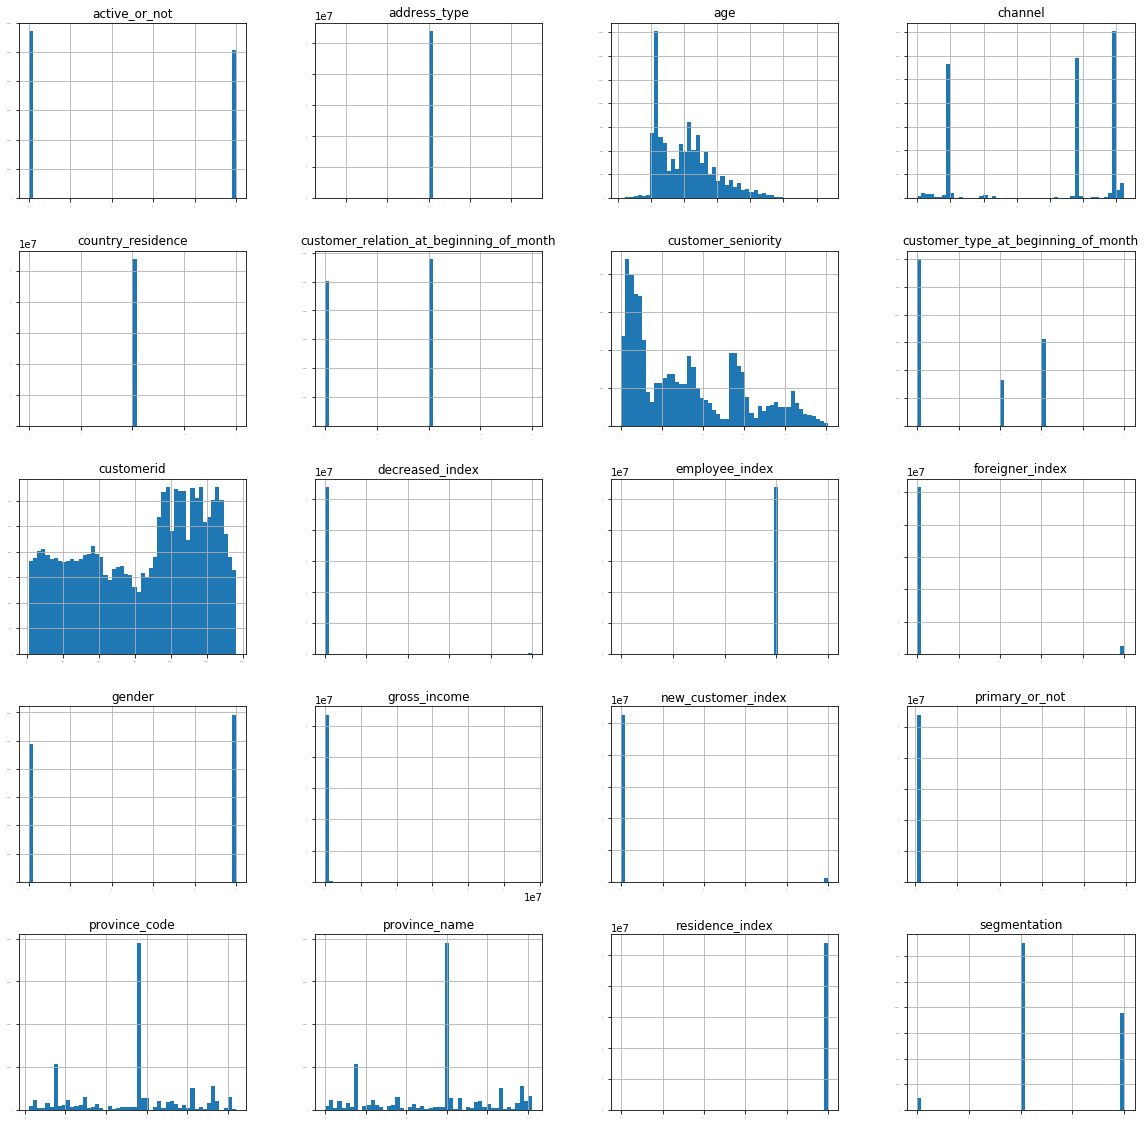

In [56]:
%matplotlib inline
ax = predictors.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(20,20))

## Plot relationship between age and product selection

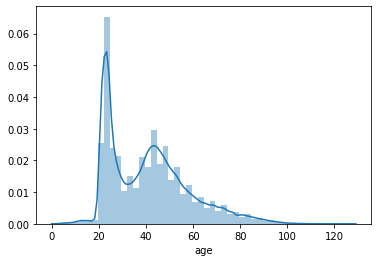

In [183]:
sns.distplot(clean_df.age)

In [158]:
df_age = (clean_df.groupby(pd.cut(clean_df['age'], [0,20,40,60,80,100, pd.np.inf], right=False))
                     .sum())

In [159]:
df_age = df_age.loc[:,'saving_account':'direct_debit']

In [161]:
df_age = df_age.T

In [167]:
df_age

age,"[0.0, 20.0)","[20.0, 40.0)","[40.0, 60.0)","[60.0, 80.0)","[80.0, 100.0)","[100.0, inf)"
saving_account,0.0,11.0,1133.0,105.0,0.0,0.0
guarantees,0.0,77.0,200.0,17.0,0.0,0.0
current_accounts,4803.0,3984462.0,2237956.0,681241.0,170330.0,5528.0
derivada_accounts,0.0,523.0,3068.0,800.0,153.0,0.0
payroll_accounts,5.0,325273.0,531066.0,84784.0,11693.0,72.0
junior_accounts,110359.0,1129.0,0.0,0.0,0.0,0.0
mas_particular_accounts,1.0,33818.0,50225.0,13108.0,2636.0,6.0
particular_accounts,6.0,157443.0,893704.0,321193.0,116857.0,5408.0
particular_plus,0.0,87648.0,332193.0,73800.0,14744.0,310.0
short_term_deposits,0.0,4720.0,10000.0,2615.0,633.0,0.0


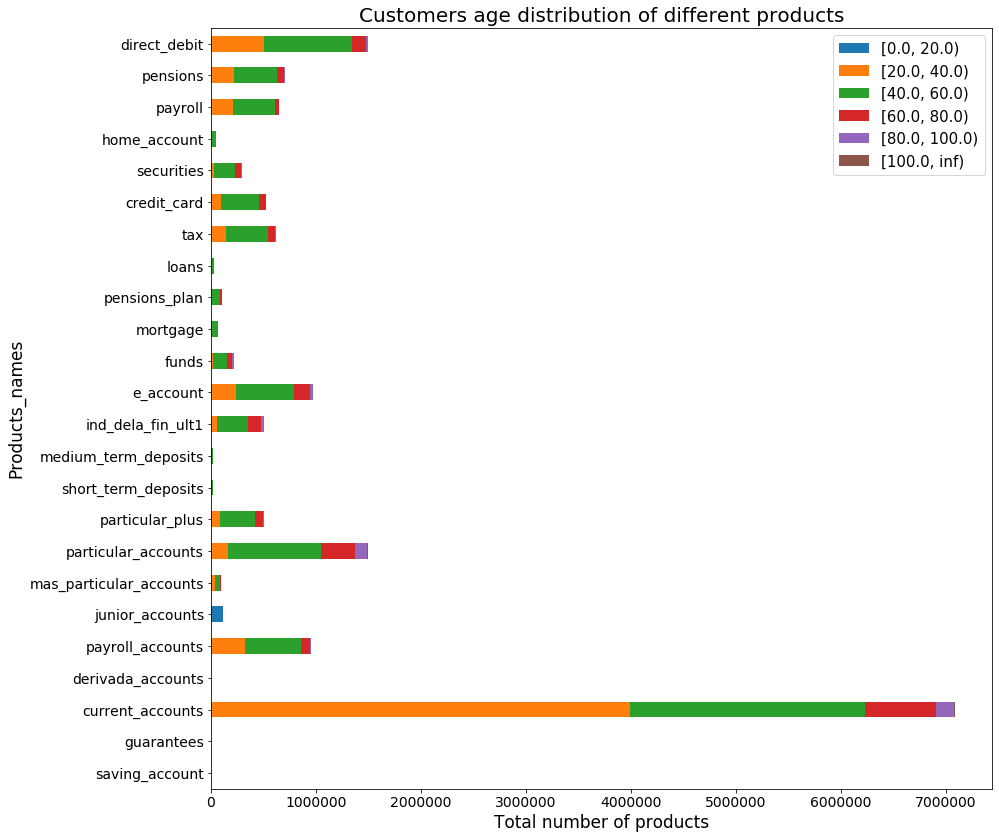

In [180]:
df_age.plot(kind='barh', stacked=True, fontsize=14, figsize=[14,14])
plt.title('Customers age distribution of different products', fontsize=20) 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

## Plot relationship between gross income and product selection

In [198]:
max(clean_df.gross_income)

28894395.51

In [199]:
min(clean_df.gross_income)

1202.73

In [213]:
for i in range(0,100):
    q = i/100
    if (i%20 == 0):
        print("{} percentile: {}".format(i, clean_df.gross_income.quantile(q=q)))


0 percentile: 1202.73
20 percentile: 62567.4
40 percentile: 87438.0
60 percentile: 119071.56
80 percentile: 174474.51


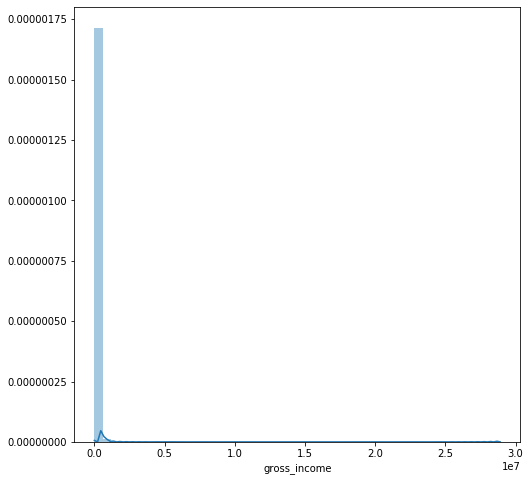

In [196]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.distplot(clean_df.gross_income)

In [214]:
df_income = (clean_df.groupby(pd.cut(clean_df['gross_income'], [0,1203,62567,87438,119072,174475, pd.np.inf], right=False))
                     .sum())

In [215]:
df_income = df_income.loc[:,'saving_account':'direct_debit']

In [216]:
df_income = df_income.T

In [217]:
df_income

gross_income,"[0.0, 1203.0)","[1203.0, 62567.0)","[62567.0, 87438.0)","[87438.0, 119072.0)","[119072.0, 174475.0)","[174475.0, inf)"
saving_account,0.0,125.0,91.0,139.0,356.0,538.0
guarantees,0.0,23.0,14.0,29.0,49.0,179.0
current_accounts,17.0,1502670.0,1467430.0,1427348.0,1367883.0,1318972.0
derivada_accounts,0.0,653.0,652.0,760.0,1086.0,1393.0
payroll_accounts,0.0,145633.0,164707.0,191040.0,220756.0,230757.0
junior_accounts,0.0,11138.0,14520.0,22671.0,29993.0,33166.0
mas_particular_accounts,0.0,15422.0,17933.0,20611.0,22664.0,23164.0
particular_accounts,0.0,186965.0,239378.0,286192.0,359385.0,422691.0
particular_plus,0.0,57486.0,81461.0,99846.0,124165.0,145737.0
short_term_deposits,0.0,3026.0,3406.0,3916.0,4114.0,3506.0


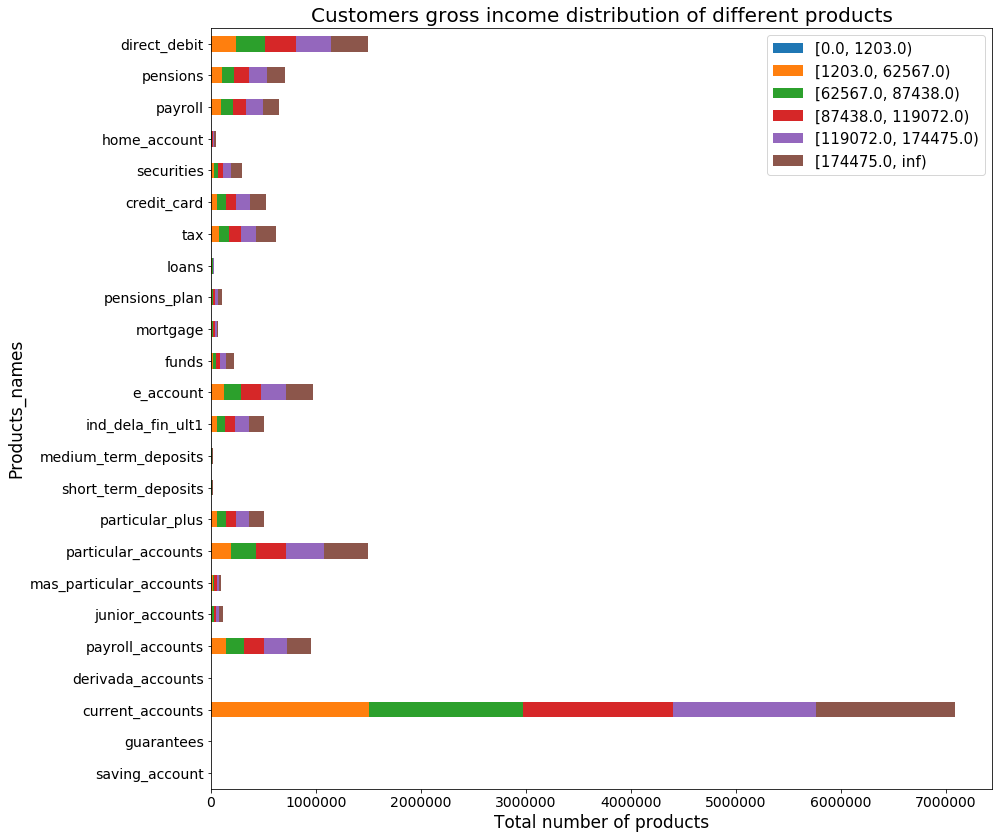

In [218]:
df_income.plot(kind='barh', stacked=True, fontsize=14, figsize=[14,14])
plt.title('Customers gross income distribution of different products', fontsize=20) 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 